**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Описание данных**

**Данные для первой части**

Файл /datasets/hypothesis.csv.

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл /datasets/orders.csv.
    
    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd

In [2]:
# оборачиваем в конструкцию для запуска локально или с платформы Яндекса
try:
    data = (pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'))
except:
    data = (pd.read_csv('/datasets/hypothesis.csv'))

In [3]:
print(data, '\n')

# приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

print(data.columns)

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5   

Index(['hypothesis', 'reach', 'impact

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
pd.set_option('display.max_colwidth', None)
data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).round(1)
data['ICE_rank'] = data['ICE'].rank(ascending= False)
data[['hypothesis', 'ICE', 'ICE_rank']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE,ICE_rank
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,2.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,3.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,5.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,6.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,7.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,8.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,9.0


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
data['RICE_rank'] = data['RICE'].rank(ascending= False)
data[['hypothesis', 'RICE', 'RICE_rank']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,RICE_rank
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,1.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,2.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3.5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,3.5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,5.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,6.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,7.5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,7.5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,9.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [6]:
(data[['hypothesis', 'RICE_rank', 'ICE_rank', 'reach', 'impact', 'confidence']].sort_values(by='RICE_rank')
 .style
 .background_gradient(cmap='Blues', axis=0)
 .format({"RICE_rank": "{:.1f}", 
          "ICE_rank": "{:.1f}", 
          "reach": "{:.1f}", 
          "impact": "{:.1f}", 
          "confidence": "{:.1f}"})
)

,hypothesis,RICE_rank,ICE_rank,reach,impact,confidence
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",1.0,3.0,10.0,7.0,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",2.0,5.0,8.0,3.0,7.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3.5,2.0,3.0,10.0,8.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3.5,4.0,5.0,3.0,8.0
8,"Запустить акцию, дающую скидку на товар в день рождения",5.0,1.0,1.0,9.0,9.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",6.0,8.0,8.0,3.0,3.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",7.5,6.0,2.0,5.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",7.5,7.0,3.0,2.0,2.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",9.0,9.0,3.0,1.0,1.0


**Вывод:**
Основная причина разницы в приоритизации гипотезы методом RICE от метода ICE заключается в том, что в топе гипотез метода ICE находяться гипотезы, которые имею незначительный охват пользователей.

## Часть 2. Анализ A/B-теста

In [7]:
# импортируем дополнительные библиотеки которые нам понадобятся в этой части
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# оборачиваем в конструкцию для запуска локально или с платформы Яндекса
try:
    orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    )
except:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )

In [9]:
print(orders.head())
print(visitors.head())
print()

# проверяем тип данных в загруженых датафреймах
print('датафреймы до изменения: \n')
orders.info()
visitors.info()
print()

# преобразовываем даты в тип дататайм
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
# приводим названия столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

# проверяем результаты преобразований    
print('датафреймы после изменения: \n')
orders.info()
visitors.info()

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

датафреймы до изменения: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ K

In [10]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [11]:
# проверяем сколько всего групп в АВ-тесте
print(visitors['group'].unique())
print(orders['group'].unique(), '\n')

# количество пользователей в каждой группе
print('Количество пользователей в каждой группе: \n',orders.groupby('group').agg({'visitorid': pd.Series.nunique}), '\n')

# минимальная и максимальная дата исследования
print('Минимальная дата исследования: \n', visitors['date'].min(),'\n')
print('Максимальная дата исследования: \n',visitors['date'].max(),'\n')

#пользователи попавшие в обе группы
print(orders.query('group == "A" and group == "B"'))

# проверяем данные на пропуски
print('Пропуски в visitors: \n', visitors.isna().sum(),'\n')
print('Пропуски в orders: \n', orders.isna().sum(),'\n')

# проверяем данные на дубликаты
print('Количество дубликатов в visitors: \n', visitors.duplicated().sum(),'\n')
print('Количество дубликатов в orders: \n', orders.duplicated().sum(),'\n')

# проверяем пользователей в обеих группах
print('Количество пользователей в обеих группах:', len(np.intersect1d(orders[orders['group']=='A']['visitorid'], orders[orders['group']=='B']['visitorid'])) ,'\n')

['A' 'B']
['B' 'A'] 

Количество пользователей в каждой группе: 
        visitorid
group           
A            503
B            586 

Минимальная дата исследования: 
 2019-08-01 00:00:00 

Максимальная дата исследования: 
 2019-08-31 00:00:00 

Empty DataFrame
Columns: [transactionid, visitorid, date, revenue, group]
Index: []
Пропуски в visitors: 
 date        0
group       0
visitors    0
dtype: int64 

Пропуски в orders: 
 transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64 

Количество дубликатов в visitors: 
 0 

Количество дубликатов в orders: 
 0 

Количество пользователей в обеих группах: 58 



**Вывод:**
    
    1. Групп в тесте 2
    2. Количество пользователей в группе В больше
    3. Минимальная дата исследования: 2019-08-01, максимальная дата исследования: 2019-08-31
    4. Количество пользователей в обеих группах: 58
    5. Пропуски и дубликаты отсутствуют


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

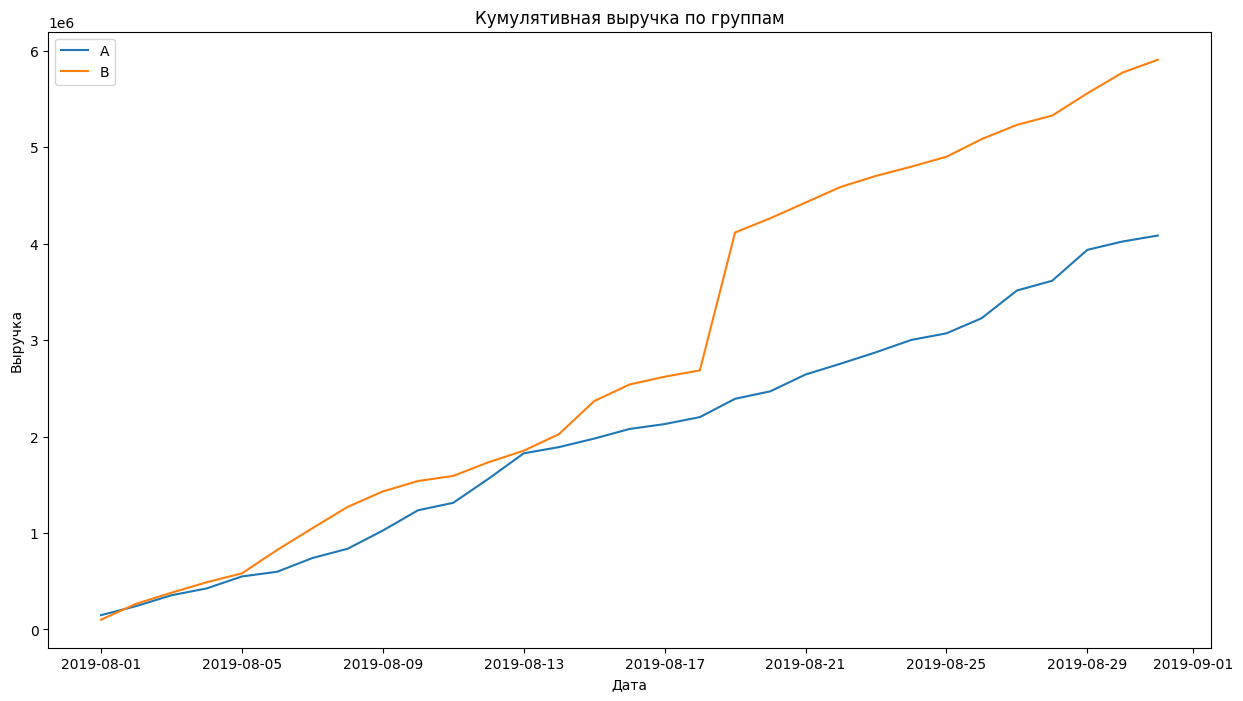

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

# Строим график выручки группы А
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
plt.show()


**Вывод:** Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы B имеет резкий скачок выручки. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

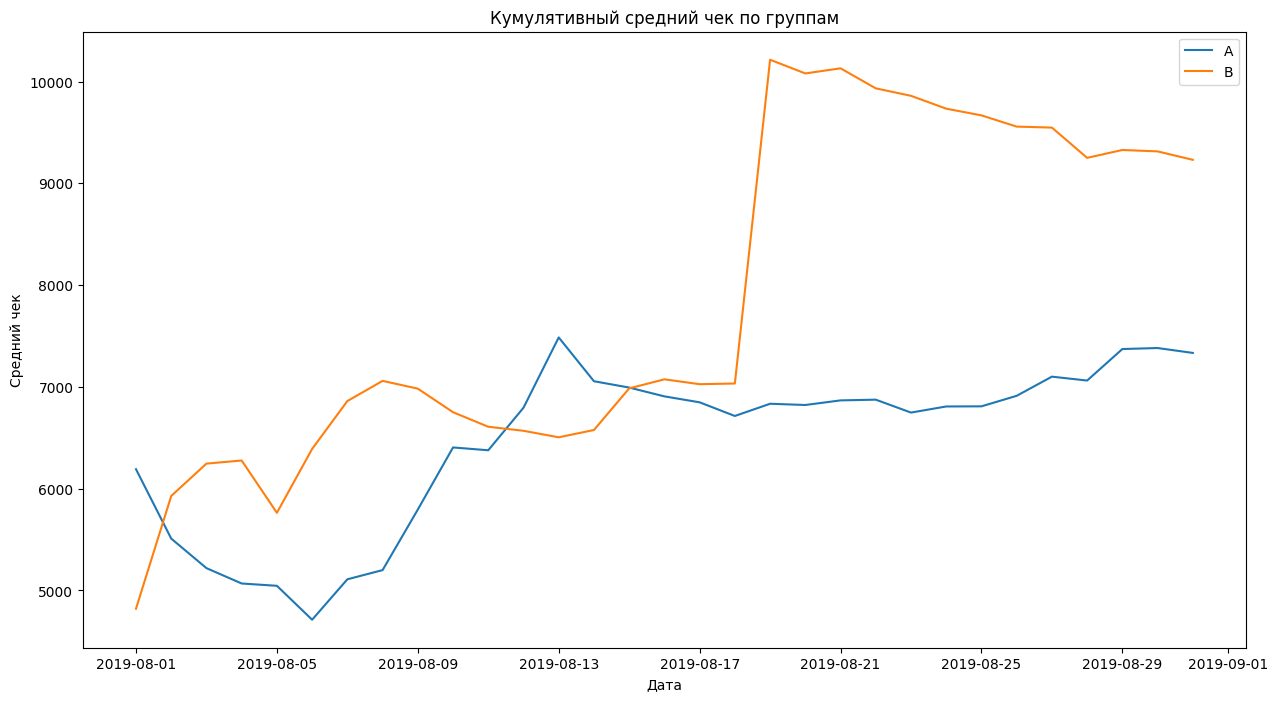

In [13]:
# Строим график среднего чека по группам
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.show()

**Вывод:** Средний чек становится равномерным ближе к концу теста: установился для группы A и начинает снижаться для группы B после всплеска в середине отрезка. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

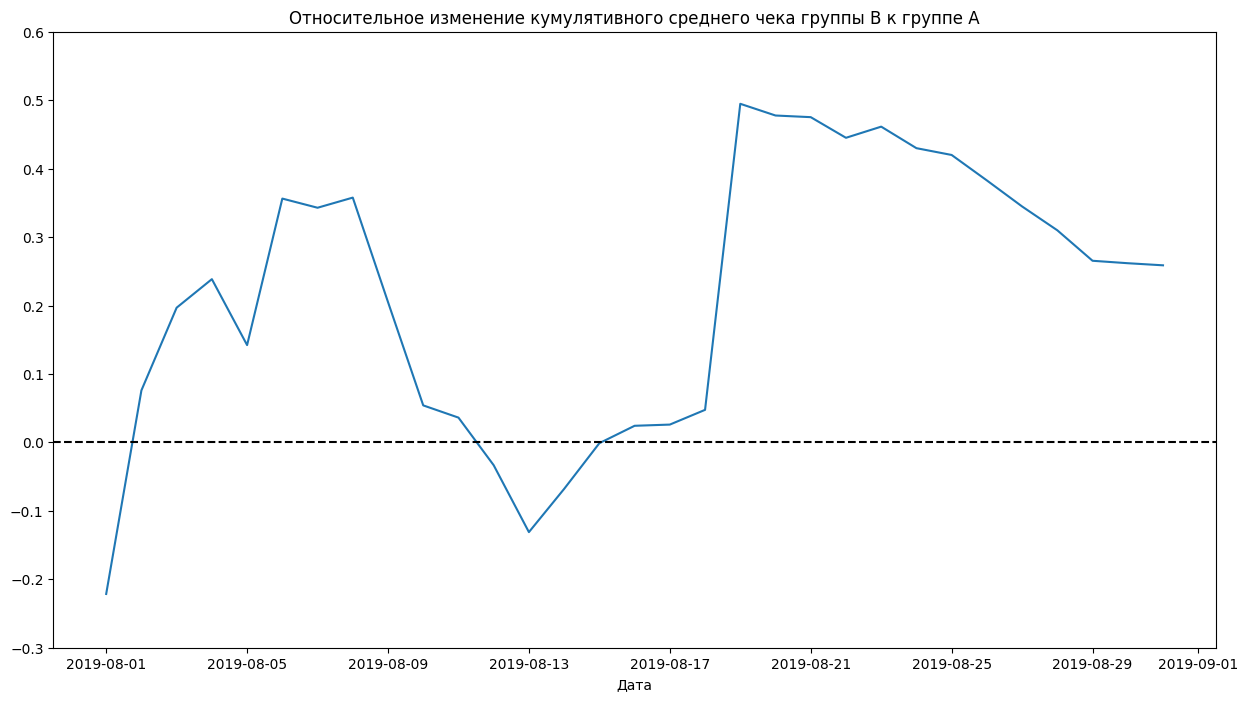

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(ymin=-0.3, ymax=0.6)
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()

**Вывод:** В нескольких точках график различия между сегментами резко отличается всплесками. Предполагаю что в данных есть крупные заказы и выбросы.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

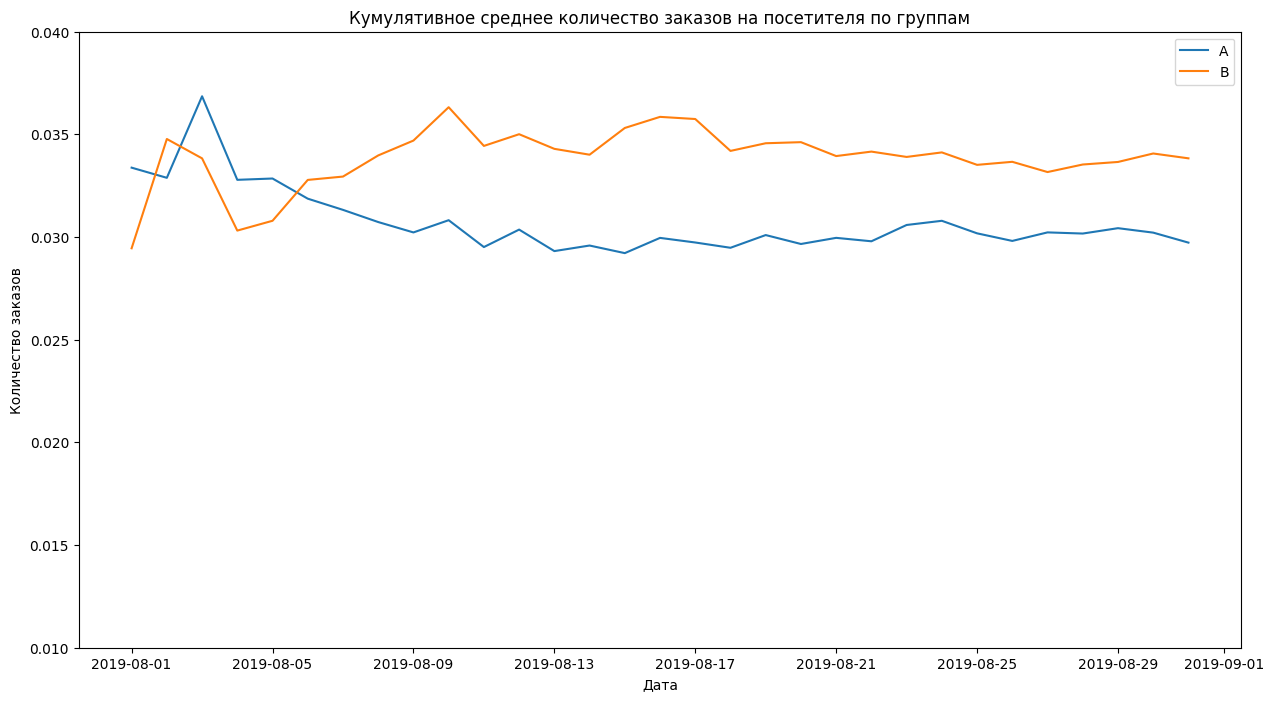

In [15]:
# Строим график среднего количества заказов на посетителя по группам
cumulativeData['average_orders'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['average_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['average_orders'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(ymin=0.01, ymax=0.04)
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.show()

**Вывод:** Количества заказов на посетителя по группам отличаются. Группа А показала падение и после этого зафиксировалась в значениях, группа В при этом показала увеличение конверсии и тоже зафиксировалась в значениях.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

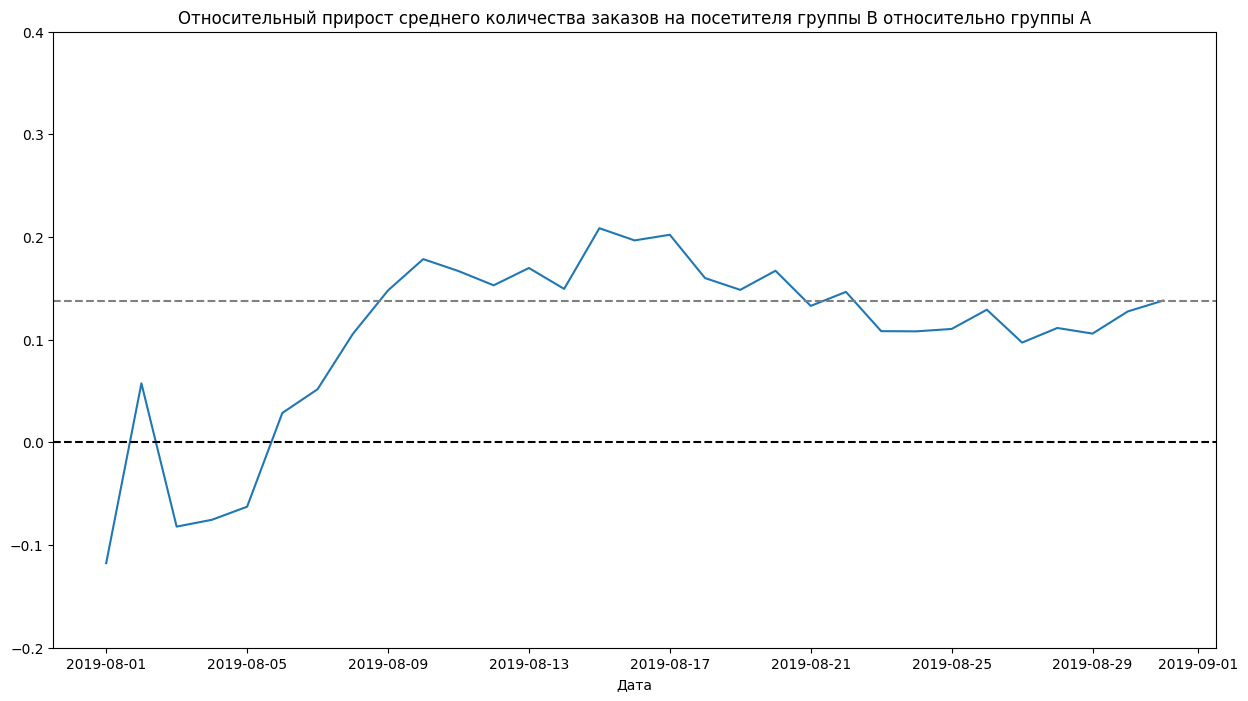

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','average_orders']].merge(cumulativeDataB[['date','average_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['average_ordersB']/mergedCumulativeConversions['average_ordersA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.138, color='grey', linestyle='--')
plt.axis(ymin=-0.2, ymax=0.4)
plt.xlabel('Дата')
plt.title('Относительный прирост среднего количества заказов на посетителя группы B относительно группы A')
plt.show()

**Вывод:** В начале теста группа B проигрывала группе A, затем вырвалась вперёд и на протяжении оставшейся части теста была выше среднего количества заказов на посетителя группы А.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


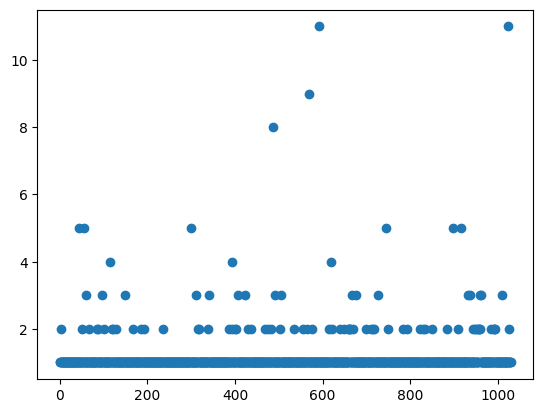

In [17]:
# создаем датафрейм с количеством заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# строим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

**Вывод:** Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-я заказами тоже значительна. 

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [18]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


**Вывод:** Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более одного раза. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

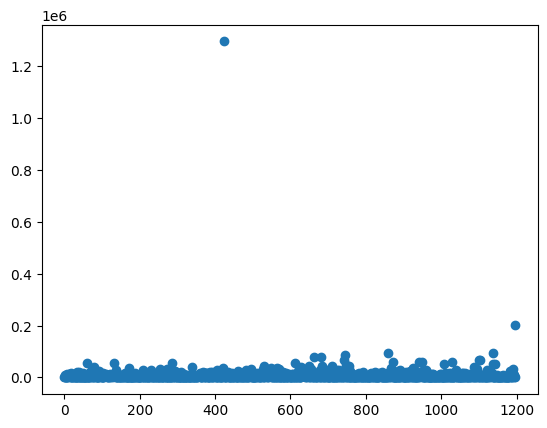

In [19]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

**Вывод:**  Есть немного дорогих заказов. По графику выбрать границу аномальных значений тяжело.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [20]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


**Вывод:** Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Разумно выбрать за верхнюю границу сумму заказа 28 000 рублей, и отсеять аномальные заказы по ней.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [21]:
# подготавливаем данные для подсчета статистической значимости 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print(data.head())

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              20           148579              21   
1 2019-08-02              19            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              15            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  20               148579   
1           165531                  39               242401   
2           114248                  63               354874   
3           108571                  78               425699   
4            92428                 103               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Комментарий студента:
    
    Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов на посетителя между группами нет
    Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов на посетителя между группами есть


In [22]:
# cчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
0.138


**Вывод:** p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выйгрыш группы B равен 13.8%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

    Нулевая гипотеза: Статистически значимые различия в среднем чеке заказа между группами есть
    Альтернативная гипотеза: Статистически значимые различия в в среднем чеке заказа между группами нет


In [23]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
0.259


**Вывод:** p-value = 0.729 больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы В значительно выше среднего чека группы А.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [24]:
# вычисляем аномальных пользователей, их идентификаторы и общее количество
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
74


    Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет
    Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть

In [25]:
# cчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.013
0.173


**Вывод:** p-value = 0.013 меньше 0.05. Результаты по среднему количеству заказов практически не изменились. А вот относительный выйгрыш группы B увеличился с 13.8% до 17.3%. Это положительный момент, так как среднее количество заказов на посетителя по группе В, по "очещенным" данным, получается даже лучше.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

    Нулевая гипотеза: Статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть
    Альтернативная гипотеза: Статистически значимые различия в в среднем чеке заказа между по «очищенным» данным группами нет

In [26]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.738
-0.020


**Вывод:** p-value = 0.738 больше 0.05. P-value незначительно увеличился, но и разница между сегментами сократилась с 25.9% до -2%.

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Имеющиеся факты:
* Есть статистически значимые различия по среднему количеству заказов между группами по «сырым» данным и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы B значительно лучше группы A:

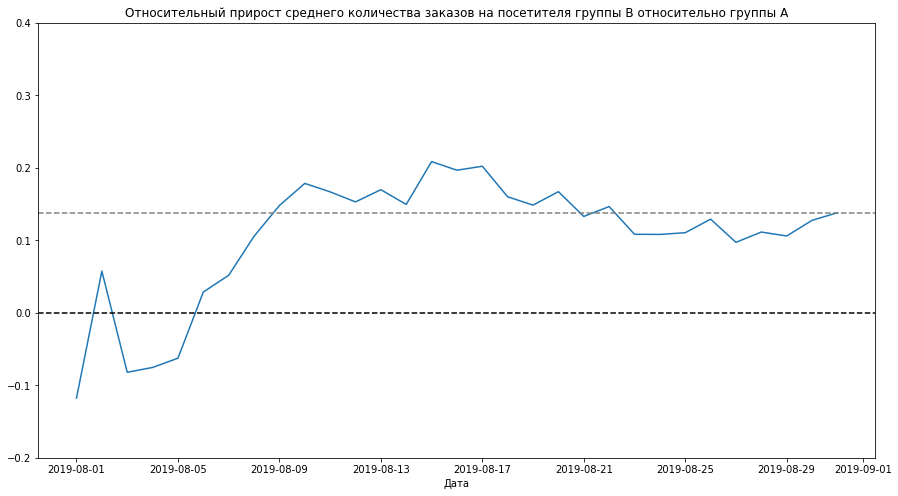

* График различия среднего чека говорит о том, что результаты группы B значительно лучше, на 26% (хоть мы и знаем из результатов вычеслений, что на это повлияли "аномальные" клиенты):

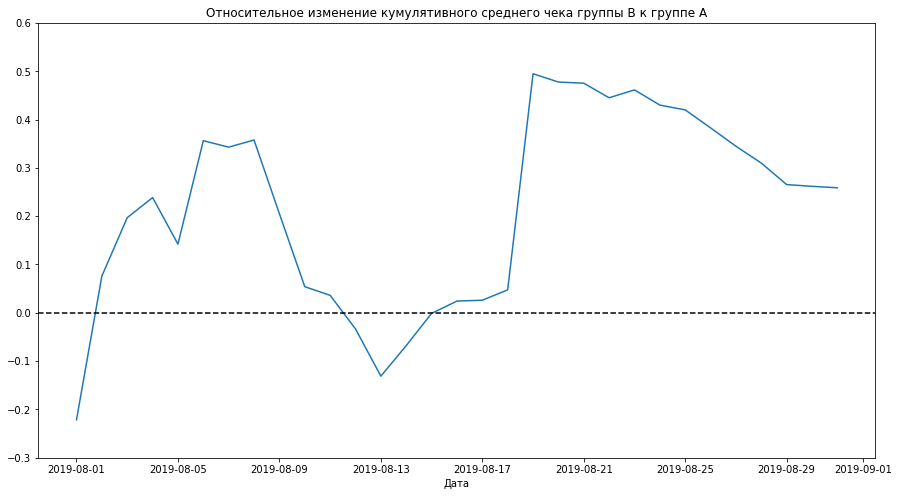

**Общий вывод: Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.**

**Количество заказов у группы В лучше, средний чек на "очищенных" данных имеет незначительное отличие от группы А, но при росте количества заказов уменьшение среднего чека вполне допустимо, и для сохранения среднего чека принимаются другие меры по улучшению качества заказов.**